In [ ]:
get_ipython().system('pip install Arabic-Stopwords')


In [ ]:
get_ipython().system('pip install pyyaml h5py')


In [ ]:
# important libraries

# for dataframes and read csv files
import pandas as pd
import numpy as np

# to deal with json files in arabic dataset
import json

# to list directories
import os

# to visual and plot data
import matplotlib.pyplot as plt
import seaborn as sns

# arabic stopwords lib
import arabicstopwords.arabicstopwords as stp

# libraries help to clean texts
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# arabic stopwords lib
import arabicstopwords.arabicstopwords as stp

In [ ]:
# for tokenizing texts
from tensorflow.keras.preprocessing.text import Tokenizer
# for text padding and truncating
from tensorflow.keras.utils import pad_sequences
# to split datasets
from sklearn.model_selection import train_test_split

# for nn arch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional,SimpleRNN,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

# to test model score and accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# English dataset
fake_dataset = pd.read_csv('Fake.csv', encoding='latin1')
true_dataset = pd.read_csv('True.csv', encoding='latin1')

<ipython-input-8-8981fa3417c9>:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_dataset = pd.read_csv('Fake.csv', encoding='latin1')


In [ ]:
# arabic dataset consist of multiple of json files

sources = ['source_' + str(i) for i in range(1, 135)]

# Print the first few elements to check
print(sources[:10])  # Print the first 10 elements as an example

['source_1', 'source_2', 'source_3', 'source_4', 'source_5', 'source_6', 'source_7', 'source_8', 'source_9', 'source_10']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Define the path to your directory in Google Drive
arabic_dir = '/content/drive/My Drive/content/AFND'

# List all files in the specified directory
try:
    print("Files in the directory:", os.listdir(arabic_dir))
except FileNotFoundError as e:
    print(f"Directory not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")




Files in the directory: ['README.md', 'sources.json', 'Dataset']


In [ ]:
# Verify the directory contents
try:
    print("Files in the directory:", os.listdir(arabic_dir))
except FileNotFoundError as e:
    print(f"Directory not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Construct the full path to sources.json
sources_path = os.path.join(arabic_dir, 'sources.json')

try:
    # Load the sources.json file
    with open(sources_path, 'r', encoding='utf-8') as f:
        labels = json.load(f)

    title = []
    text = []
    label = []

    # Iterate over the labels dictionary
    for i in labels:
        # Construct the path to each scraped_articles.json file
        articles_path = os.path.join(arabic_dir, 'Dataset', i, 'scraped_articles.json')

        print("Checking file existence:", articles_path)  # Debugging print

        # Check if the file exists
        if not os.path.exists(articles_path):
            print(f"{articles_path}")
            continue

        # Open and read the scraped_articles.json file
        with open(articles_path, 'r', encoding='utf-8') as ff:
            data = json.load(ff)['articles']  # for each article
            for article in data:
                if labels[i] != 'undecided':
                    title.append(article['title'])  # get the title
                    text.append(article['text'])  # get the text
                    label.append(1 if labels[i] == 'credible' else 0)  # label the record

    print("Data loaded successfully.")

except Exception as e:
    print(f"An error occurred: {e}")

Files in the directory: ['README.md', 'sources.json', 'Dataset']
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_1/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_2/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_3/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_4/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_5/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_6/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_7/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_8/scraped_articles.json
Checking file existence: /content/drive/My Drive/content/AFND/Dataset/source_9/scraped_articles.json
Checking file existence: /

# **Explore English Dataset**

In [ ]:
fake_dataset['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [ ]:
fake_dataset.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fake_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Columns: 172 entries, title to Unnamed: 171
dtypes: object(172)
memory usage: 30.9+ MB


In [ ]:
fake_dataset.isna().sum()

title              42
text               42
subject            63
date               63
Unnamed: 4      23523
                ...  
Unnamed: 167    23542
Unnamed: 168    23542
Unnamed: 169    23542
Unnamed: 170    23542
Unnamed: 171    23542
Length: 172, dtype: int64

In [ ]:
true_dataset.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,NaN,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,NaN,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,NaN,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,NaN,NaN,NaN,NaN


In [ ]:
true_dataset.isna().sum()

title             0
text              0
subject           0
date              0
Unnamed: 4    21416
Unnamed: 5    21416
Unnamed: 6    21416
Unnamed: 7    21416
dtype: int64

# **Clean and Preprocessing (English Dataset)**

In [ ]:
# labeling The dataset
fake_dataset['label'] = 0
true_dataset['label'] = 1

In [ ]:
# Concatenate datasets
en_dataset = pd.concat([fake_dataset,true_dataset],ignore_index=True,sort=False)
en_dataset

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44956,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
44957,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
44958,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
44959,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# combine title with text
en_dataset['text'] = en_dataset['title'] + en_dataset['text']
en_dataset.drop(['title'], axis=1, inplace=True)

In [ ]:
en_dataset.head(1)

,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# **Explore Arabic Dataset**

In [ ]:
print(len(title))
print(len(text))
print(len(label))

374543
374543
374543


In [ ]:
text[0]

'يخوض المنتخب الوطني المغربي لكرة القدم لأقل من 20 سنة، ما بين 24 و28 ماي الجاري تجمعا إعداديا مغلقا بمركب محمد السادس لكرة القدم بالمعمورة.\n\nوذكر بلاغ للجامعة الملكية المغربية لكرة القدم، أن هذا التجمع الاعدادي يدخل في إطار استعدادات النخبة الوطنية للمشاركة في البطولة العربية التي ستحتضنها مصر في الفترة المتراوحة ما بين 19 يونيو و3 يوليوز 2021.\n\nولهذا الغرض، وجه السيد فتحي جمال، المشرف العام على المنتخب الوطني الدعوة إلى 24 لاعبا ويتعلق الأمر بكل من :\n\n1- عبد الله بنتيك ......... أكاديمية محمد السادس\n\n2- اسماعيل لغزالي ..... أكاديمية محمد السادس\n\n3- أنس نناح ............... أكاديمية محمد السادس\n\n4- محمد أمين السهل .. أكاديمية محمد السادس\n\n5- حسن أكبوب ........... أكاديمية محمد السادس\n\n6- عمر صادق .............. أكاديمية محمد السادس\n\n7- عثمان شرايبي ........ أكاديمية محمد السادس\n\n8- محمد راديد ............. أكاديمية محمد السادس\n\n9- بدر أوهامي ............. النسمة السطاتية\n\n10- عبد اللطيف المتطوع .... شباب الصخور السوداء\n\n11- حسام بولاينين ........... الجيش الم

In [ ]:
title[0]

'المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجمعا اعداديا بالمعمورة'

In [ ]:
ar_dataset = pd.DataFrame({'title':title,'text':text,'label':label})

In [ ]:
ar_dataset.head()

,title,text,label
0,المنتخب الوطني المغربي لأقل من 20 سنة يخوض تجم...,يخوض المنتخب الوطني المغربي لكرة القدم لأقل من...,1
1,وزير النقل اعمارة:السرعة عامل مسبب لحوادث السي...,ترأس عبد القادر اعمارة، وزير التجهيز و النقل و...,1
2,"ميسي يؤكد أن الفوز بكأس اسبانيا كان ""نقطة تحول""",أكد النجم الارجنتيني ليونيل ميسي أن فوز فريقه ...,1
3,دبلوماسي مغربي سابق بإسبانيا لـ2M.ma: خطأ مدري...,أكّد الدبلوماسي المغربي السابق بإسبانيا، عبد ا...,1
4,شركتان، فرنسية وبريطانية تعلنان عن نتائج إيجاب...,أعلنت شركتا سانوفي الفرنسية العملاقة في تصنيع ...,1


In [ ]:
ar_dataset['text'] = ar_dataset['title'] + ar_dataset['text']
ar_dataset.drop(['title'],axis=1,inplace=True)

In [ ]:
# Check the value counts of the 'label' column before sampling
print("Before sampling:")
print(ar_dataset['label'].value_counts())

Before sampling:
label
1    207310
0    167233
Name: count, dtype: int64


In [ ]:
# sample dataset
true_sample = ar_dataset[ar_dataset['label'] == 1][:5000]
fake_sample = ar_dataset[ar_dataset['label'] == 0][:5000]

In [ ]:
ar_dataset = pd.concat([fake_sample,true_sample],ignore_index=True,sort=False)


In [ ]:
ar_dataset['label'].value_counts()

label
0    5000
1    5000
Name: count, dtype: int64

In [ ]:
from nltk import FreqDist
def plot_word_frequency(words, top_n=15, rotation=0):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(28, 5))
    g = sns.barplot(x=labels, y=counts)
    return g

In [ ]:
notesb = "".join(ar_dataset.text)
notes_wordsb = notesb.split()

Text(0.5, 1.0, 'Word frequencies After removing stopwords and punctuations')

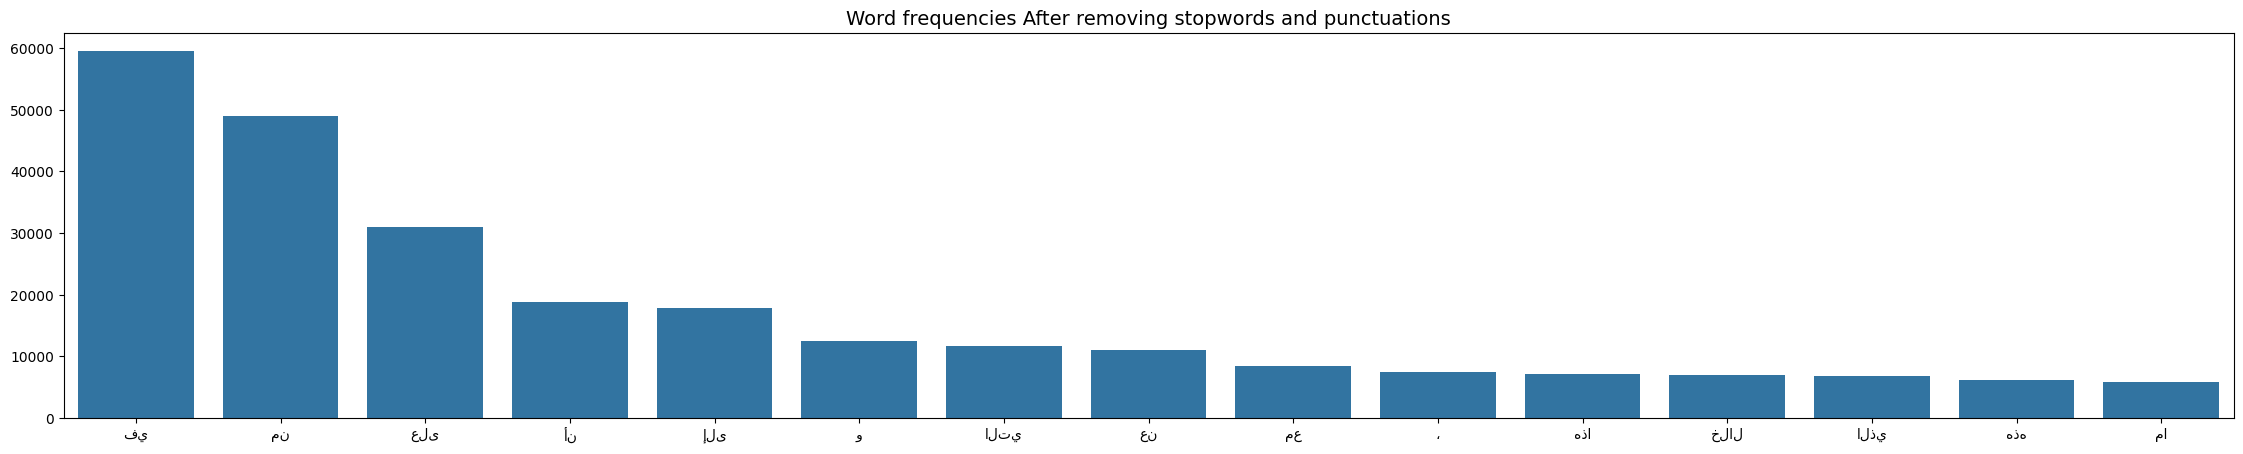

In [ ]:
plot_word_frequency(notes_wordsb).set_title('Word frequencies After removing stopwords and punctuations',fontsize =14)

# **data preprocessing before training**

In [ ]:
# Remove Stopwords
def remove_english_stopwords(text):
    stop_words = stopwords.words('english')
    words = text.split()
    filtered_sentence = ''
    for word in words:
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

def remove_arabic_stopwords(text):
    stop_words = stp.stopwords_list()
    words = text.split()
    filtered_sentence = ''
    for word in words:
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

# Remove Punvtuation
def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation)
    words = text.split()
    filtered_sentence = ''
    for word in words:
        word = word.translate(table)
        filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

# Normalize Text
def normalize_english_text(text):
    text = text.lower()
    # get rid of urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # get rid of non words and extra spaces
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('^ ', '', text)
    text = re.sub(' $', '', text)
    return text


def normalize_arabic_text(text):
    text = re.sub(r"[إأٱآا]", "ا", text)
    text = re.sub(r"ى", "ي", text)
    text = re.sub(r"ؤ", "ء", text)
    text = re.sub(r"ئ", "ء", text)
    text = re.sub(r'[^ا-ي ]', "", text)

    noise = re.compile(""" ّ    | # Tashdid
                         َ    | # Fatha
                         ً    | # Tanwin Fath
                         ُ    | # Damma
                         ٌ    | # Tanwin Damm
                         ِ    | # Kasra
                         ٍ    | # Tanwin Kasr
                         ْ    | # Sukun
                         ـ     # Tatwil/Kashida
                     """, re.VERBOSE)
    text = re.sub(noise, '', text)
    return text

# combine all functions into one
def clean_arabic_text(text):
    text = text.replace(',',' , ')
    text = text.replace('.',' . ')
    text = text.replace('/',' / ')
    text = text.replace('@',' @ ')
    text = text.replace('#',' # ')
    text = text.replace('?',' ? ')
    text = normalize_arabic_text(text)
    text = remove_punctuation(text)
    text = remove_arabic_stopwords(text)
    return text
def clean_english_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.replace(',', ' , ')
        text = text.replace('.', ' . ')
        text = normalize_english_text(text)
        text = remove_punctuation(text)
        text = remove_english_stopwords(text)
        return text

# Apply the function to your DataFrame, handling NaN values
en_dataset['text'] = en_dataset['text'].apply(clean_english_text)
en_dataset['text'] = en_dataset['text'].fillna('')  # Fill NaN values with an empty string or any other suitable value


In [ ]:
en_dataset['text'] = en_dataset['text'].apply(clean_english_text)

In [ ]:
ar_dataset['text'] = ar_dataset['text'].apply(clean_arabic_text)

# **`Feature Engineering`**

In [ ]:
# split data
# for arabic data
ar_X_train, ar_X_test, ar_y_train, ar_y_test = train_test_split(ar_dataset["text"]
                                                                , ar_dataset['label']
                                                                , test_size=0.1,
                                                                shuffle=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word',max_features=5000)
tfidf_vect.fit(ar_dataset['text'].values.astype('U'))
xtrain_tfidf = tfidf_vect.transform(ar_X_train.values.astype('U')).toarray()
xvalid_tfidf = tfidf_vect.transform(ar_y_train.values.astype('U')).toarray()

print(xtrain_tfidf.shape)
print(xvalid_tfidf.shape)

(9000, 5000)
(9000, 5000)


In [ ]:
tfidf_feature_names = tfidf_vect.get_feature_names_out()
print("\nSample of TF-IDF Feature Names:")
print(tfidf_feature_names[:10])


Sample of TF-IDF Feature Names:
['ابتدا' 'ابدا' 'ابرام' 'ابراهيم' 'ابرز' 'ابرزها' 'ابريل' 'ابطال' 'ابعاد'
 'ابل']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame named ar_dataset with a 'text' column
# and X_train, y_train are the training and validation sets

tfidf_vect = TfidfVectorizer(analyzer='word', max_features=5000)
tfidf_vect.fit(ar_dataset['text'].values.astype('U'))

xtrain_tfidf = tfidf_vect.transform(ar_X_train.values.astype('U')).toarray()
xvalid_tfidf = tfidf_vect.transform(ar_y_train.values.astype('U')).toarray()

# Get feature names
tfidf_feature_names = tfidf_vect.get_feature_names_out()

# Display the shape of the TF-IDF matrices
print("TF-IDF Training Set Shape:", xtrain_tfidf.shape)
print("TF-IDF Validation Set Shape:", xvalid_tfidf.shape)

# Display a sample of feature names with their corresponding Arabic text
sample_indices = [0, 1, 2, 3, 4]  # Adjust the indices as needed
sample_feature_names = tfidf_feature_names[sample_indices]

# Create a mapping between feature indices and Arabic text
feature_mapping = dict(zip(sample_feature_names, sample_indices))

# Display the mapping
print("\nSample of TF-IDF Feature Names and Corresponding Arabic Text:")
for feature_name, index in feature_mapping.items():
    print(f"Feature Index {index}: {feature_name}")


TF-IDF Training Set Shape: (9000, 5000)
TF-IDF Validation Set Shape: (9000, 5000)

Sample of TF-IDF Feature Names and Corresponding Arabic Text:
Feature Index 0: ابتدا
Feature Index 1: ابدا
Feature Index 2: ابرام
Feature Index 3: ابراهيم
Feature Index 4: ابرز


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer='word', max_features=5000)
count_train = count_vec.fit(ar_dataset['text'].values.astype('U'))
bag_of_words_train = count_vec.transform(ar_X_train.values.astype('U')).toarray()
bag_of_words_test = count_vec.transform(ar_X_train.values.astype('U')).toarray()



print(bag_of_words_train.shape)
print(bag_of_words_test.shape)

(9000, 5000)
(9000, 5000)


In [ ]:
# Reduce the size of the dataset by sampling a fraction (e.g., 10%)
sample_fraction = 0.2
ar_dataset_sampled = ar_dataset.sample(frac=sample_fraction, random_state=42)
X_train_sample, X_test_sample,y_train_sample, y_test_sample = train_test_split(ar_dataset_sampled["text"]
                                                                , ar_dataset_sampled['label']
                                                                , test_size=0.1,
                                                                shuffle=True)
ar_dataset_sampled.head()

,text,label
6252,بورتريه الحاجة الحمداوية سيدة فن العيطة بالمغر...,1
4684,تم تمديد اجال اقتنا قسيمة السياراتمددت المديري...,0
1731,ثلاث قطاعات تهتز اليوم وقع الاضراباتتصاعدت وتي...,0
4742,قطاع العمل التشغيل الضمان الاجتماعيهذه الوثاق ...,0
4521,فتح مسابقة لتوظيف طالب قاضاعلنت وزارة العدل فت...,0


In [ ]:
!pip install nltk


In [ ]:

from nltk.util import ngrams
import pandas as pd
from nltk.corpus import stopwords

# Assuming you have a DataFrame named ar_dataset with a 'text' column
# and ar_dataset_sampled is a downsampled dataset

# Define the n-gram range
ngram_range = (1, 4)

# Create CountVectorizer with stop words and n-gram range
vectorizer = CountVectorizer(analyzer='word', stop_words=stopwords.words('arabic'), ngram_range=ngram_range)

# Fit and transform the text to get the features
X = vectorizer.fit_transform(ar_dataset_sampled['text'].values.astype('U'))

# Display the feature names
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)

# Create a DataFrame to store the n-gram features
data = {"Text": []}

# Display n-gram features for each sample
for sample_index in range(len(ar_dataset_sampled)):
    data["Text"].append(ar_dataset_sampled['text'].iloc[sample_index])

    for i in range(1, ngram_range[1] + 1):
        ngram_features = list(ngrams(ar_dataset_sampled['text'].iloc[sample_index].split(), i))

        # Pad the feature list with zeros to ensure equal length
        padded_features = ngram_features + [0] * (5 - len(ngram_features))
        data[f"{i}-gram"] = padded_features

# Find the common length for all lists in the DataFrame
min_length = min(len(data[col]) for col in data)

# Trim all lists to the common length
for col in data:
    data[col] = data[col][:min_length]

# Create a DataFrame to display the results
result_df = pd.DataFrame(data)
print("\nTable of Features for Each N-gram:")
print(result_df)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


Feature Names: ['اابريل' 'اابريل ملف' 'اابريل ملف المرتزقة' ... 'ييلاطو رشيد'
 'ييلاطو رشيد شو' 'ييلاطو رشيد شو الفيديواستضاف']

Table of Features for Each N-gram:
                                                 Text      1-gram  \
0   بورتريه الحاجة الحمداوية سيدة فن العيطة بالمغر...   (شاهدوا,)   
1   تم تمديد اجال اقتنا قسيمة السياراتمددت المديري...   (الحلقة,)   
2   ثلاث قطاعات تهتز اليوم وقع الاضراباتتصاعدت وتي...  (التاسعة,)   
3   قطاع العمل التشغيل الضمان الاجتماعيهذه الوثاق ...    (سلسلة,)   
4   فتح مسابقة لتوظيف طالب قاضاعلنت وزارة العدل فت...      (دار,)   
..                                                ...         ...   
95  ايران ادارة بايدن رفع العقوبات محادثات احيا ال...    (وفاته,)   
96  اضيفي الي منزلك لمسة طبيعية الاكسسوارات يدوية ...     (خميس,)   
97  الاهلي المصري يضع قدما نصف نهاي ابطال افريقياح...    (دقيقة,)   
98  حزب ايطالي يطالب بتوضيح حدث قبالة السواحل اللي...     (ليلا,)   
99  الشرطة تستبعد ان يكون الهجوم بسكين المانيا بدا...    (اليكم,)   

       

In [ ]:
# Display the results in a table
result_df_display = result_df.set_index('Text').transpose()
result_df_display.columns.name = None  # Remove the column name for better display
print(result_df_display)


       بورتريه الحاجة الحمداوية سيدة فن العيطة بالمغرب ثارت وجه المستعمروقفت المسرح غنت وابدعت رواع الفن الشعبي التراثي مدي عقود وفجر اليوم رحلت الحاجة الحمداوية عمر ناهز عاما ايقونة الاغنية الشعبية وبالاغنية الشعبية ثارت وجه المستعمر الفرنسيظلت ابنة الدار البيضا وفية لنمطها الموسيقي تحمل الدف المعروف بالبندير انيقة بقفطانها المغربيبورتريه الراحلة الحمداوية الفيديو التالي   \
1-gram                                          (شاهدوا,)                                                                                                                                                                                                                                                                                                                                 
2-gram                                   (شاهدوا, الحلقة)                                                                                                                                                                                         

In [ ]:
# Create a DataFrame to display the results
result_df = pd.DataFrame(data)
print("\nTable of Features for Each N-gram:")
print(result_df)

# Display the results in a table
result_df_display = result_df.set_index('Text').transpose()
result_df_display.columns.name = None  # Remove the column name for better display
print(result_df_display)



Table of Features for Each N-gram:
                                                 Text      1-gram  \
0   بورتريه الحاجة الحمداوية سيدة فن العيطة بالمغر...   (شاهدوا,)   
1   تم تمديد اجال اقتنا قسيمة السياراتمددت المديري...   (الحلقة,)   
2   ثلاث قطاعات تهتز اليوم وقع الاضراباتتصاعدت وتي...  (التاسعة,)   
3   قطاع العمل التشغيل الضمان الاجتماعيهذه الوثاق ...    (سلسلة,)   
4   فتح مسابقة لتوظيف طالب قاضاعلنت وزارة العدل فت...      (دار,)   
..                                                ...         ...   
95  ايران ادارة بايدن رفع العقوبات محادثات احيا ال...    (وفاته,)   
96  اضيفي الي منزلك لمسة طبيعية الاكسسوارات يدوية ...     (خميس,)   
97  الاهلي المصري يضع قدما نصف نهاي ابطال افريقياح...    (دقيقة,)   
98  حزب ايطالي يطالب بتوضيح حدث قبالة السواحل اللي...     (ليلا,)   
99  الشرطة تستبعد ان يكون الهجوم بسكين المانيا بدا...    (اليكم,)   

                 2-gram                      3-gram  \
0      (شاهدوا, الحلقة)   (شاهدوا, الحلقة, التاسعة)   
1     (الحلقة, التاسعة)  

In [ ]:
# ... (previous code)

# Create a DataFrame to display the results
result_df = pd.DataFrame(data)

# Display the results in a table without the 'Text' column
result_df_display = result_df.drop('Text', axis=1).transpose()
result_df_display.columns.name = None  # Remove the column name for better display

# Print the table of features for each n-gram
print("\nTable of Features for Each N-gram:")
print(result_df_display)



Table of Features for Each N-gram:
                                      0                              1   \
1-gram                         (شاهدوا,)                      (الحلقة,)   
2-gram                  (شاهدوا, الحلقة)              (الحلقة, التاسعة)   
3-gram         (شاهدوا, الحلقة, التاسعة)       (الحلقة, التاسعة, سلسلة)   
4-gram  (شاهدوا, الحلقة, التاسعة, سلسلة)  (الحلقة, التاسعة, سلسلة, دار)   

                                         2                                3   \
1-gram                           (التاسعة,)                         (سلسلة,)   
2-gram                     (التاسعة, سلسلة)                     (سلسلة, دار)   
3-gram                (التاسعة, سلسلة, دار)       (سلسلة, دار, السلعةتتمحور)   
4-gram  (التاسعة, سلسلة, دار, السلعةتتمحور)  (سلسلة, دار, السلعةتتمحور, قصة)   

                                    4                               5   \
1-gram                          (دار,)                 (السلعةتتمحور,)   
2-gram             (دار, السلعةتتمحور) 

In [ ]:
# for english data
en_X_train, en_X_test, en_y_train, en_y_test = train_test_split(en_dataset["text"]
                                                                , en_dataset['label']
                                                                , test_size=0.2,
                                                                random_state=42,
                                                                shuffle=True)

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Define parameters for vectorization
max_features = 5000  # Adjust the maximum number of features as needed
ngram_range = (1, 3)  # Define the range for n-grams



In [ ]:
# important properties
vocab_size_ar = 20000
max_length_ar = 500

vocab_size_en = 10000
max_length_en = 250

trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
# for arabic dataset
tokenizer_ar = Tokenizer(num_words=vocab_size_ar, oov_token=oov_tok)
tokenizer_ar.fit_on_texts(ar_X_train)

In [ ]:
# for english dataset
tokenizer_en = Tokenizer(num_words=vocab_size_en, oov_token=oov_tok)
tokenizer_en.fit_on_texts(en_X_train)

In [ ]:
#To Save conf execute this cell
#Save Tokenizer Configuration

tok_conf_en = tokenizer_en.to_json()
tok_conf_ar = tokenizer_ar.to_json()


In [ ]:
# tokenizing
# for arabic data
ar_X_train = tokenizer_ar.texts_to_sequences(ar_X_train)
ar_X_test = tokenizer_ar.texts_to_sequences(ar_X_test)

In [ ]:
#for english data
en_X_train = tokenizer_en.texts_to_sequences(en_X_train)
en_X_test = tokenizer_en.texts_to_sequences(en_X_test)

In [ ]:
# text padding and truncating
# for arabic data
ar_X_train = pad_sequences(ar_X_train, maxlen=max_length_ar,
                         padding=padding_type,
                         truncating=trunc_type)
ar_X_test = pad_sequences(ar_X_test, maxlen=max_length_ar,
                         padding=padding_type,
                         truncating=trunc_type)

In [ ]:
# for english data
en_X_train = pad_sequences(en_X_train, maxlen=max_length_en,
                         padding=padding_type,
                         truncating=trunc_type)
en_X_test = pad_sequences(en_X_test, maxlen=max_length_en,
                         padding=padding_type,
                         truncating=trunc_type)

# Model Building and Training



In [ ]:
# Create the LSTM model for Arabic dataset
arabic_model = Sequential()
arabic_model.add(Embedding(input_dim=vocab_size_ar, output_dim=64, input_length=max_length_ar))

In [ ]:
arabic_model.add(Bidirectional(LSTM(128)))  # Bidirectional LSTM layer

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding

# Define the model for Arabic dataset with SimpleRNN
arabic_model_rnn = Sequential()
arabic_model_rnn.add(Embedding(input_dim=vocab_size_ar, output_dim=64, input_length=max_length_ar))
arabic_model_rnn.add(SimpleRNN(128))  # Use SimpleRNN layer without return_sequences
arabic_model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the Arabic RNN model
arabic_model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Arabic RNN model
arabic_model_rnn.fit(ar_X_train, ar_y_train, epochs=20, validation_data=(ar_X_test, ar_y_test))


Epoch 1/20
282/282 [==============================] - 64s 220ms/step - loss: 0.6998 - accuracy: 0.5001 - val_loss: 0.6990 - val_accuracy: 0.4990
Epoch 2/20
282/282 [==============================] - 64s 227ms/step - loss: 0.6959 - accuracy: 0.5143 - val_loss: 0.6923 - val_accuracy: 0.5090
Epoch 3/20
282/282 [==============================] - 59s 209ms/step - loss: 0.6981 - accuracy: 0.5130 - val_loss: 0.6943 - val_accuracy: 0.5150
Epoch 4/20
282/282 [==============================] - 60s 213ms/step - loss: 0.6947 - accuracy: 0.5123 - val_loss: 0.6918 - val_accuracy: 0.5030
Epoch 5/20
282/282 [==============================] - 57s 201ms/step - loss: 0.6894 - accuracy: 0.5144 - val_loss: 0.6933 - val_accuracy: 0.5370
Epoch 6/20
282/282 [==============================] - 60s 214ms/step - loss: 0.6944 - accuracy: 0.5099 - val_loss: 0.7288 - val_accuracy: 0.4880
Epoch 7/20
282/282 [==============================] - 56s 200ms/step - loss: 0.6959 - accuracy: 0.5103 - val_loss: 0.6931 - val_ac

In [ ]:
from tensorflow.keras.layers import LSTM, Embedding
# Example for Arabic LSTM model with different hyperparameters
arabic_model_lstm = Sequential()
arabic_model_lstm.add(Embedding(input_dim=vocab_size_ar, output_dim=128, input_length=max_length_ar))
arabic_model_lstm.add(LSTM(128))  # Use LSTM layer without return_sequences
arabic_model_lstm.add(Dense(1, activation='sigmoid'))
arabic_model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
arabic_model_lstm.fit(ar_X_train, ar_y_train, epochs=15, validation_data=(ar_X_test, ar_y_test))



Epoch 1/15
282/282 [==============================] - 316s 1s/step - loss: 0.6925 - accuracy: 0.5154 - val_loss: 0.6907 - val_accuracy: 0.5080
Epoch 2/15
282/282 [==============================] - 293s 1s/step - loss: 0.6844 - accuracy: 0.5189 - val_loss: 0.6911 - val_accuracy: 0.5080
Epoch 3/15
282/282 [==============================] - 299s 1s/step - loss: 0.6785 - accuracy: 0.5193 - val_loss: 0.6913 - val_accuracy: 0.5090
Epoch 4/15
282/282 [==============================] - 277s 980ms/step - loss: 0.6761 - accuracy: 0.5184 - val_loss: 0.7042 - val_accuracy: 0.5040
Epoch 5/15
282/282 [==============================] - 268s 949ms/step - loss: 0.6801 - accuracy: 0.5279 - val_loss: 0.6909 - val_accuracy: 0.5110
Epoch 6/15
282/282 [==============================] - 263s 934ms/step - loss: 0.6741 - accuracy: 0.5227 - val_loss: 0.6956 - val_accuracy: 0.5110
Epoch 7/15
282/282 [==============================] - 277s 982ms/step - loss: 0.6724 - accuracy: 0.5181 - val_loss: 0.6983 - val_accu

In [ ]:
arabic_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

In [ ]:
# Compile the model
arabic_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# Train the Arabic model
arabic_model.fit(ar_X_train, ar_y_train, epochs=10, validation_data=(ar_X_test, ar_y_test))

In [ ]:
# Create the LSTM model for English dataset
english_model = Sequential()
english_model.add(Embedding(input_dim=vocab_size_en, output_dim=64, input_length=max_length_en))
english_model.add(Bidirectional(LSTM(64)))  # Bidirectional LSTM layer
english_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
english_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Train the English model
english_model.fit(en_X_train, en_y_train, epochs=10, validation_data=(en_X_test, en_y_test))


In [ ]:
english_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Create the LSTM model for English dataset
english_model_gan = Sequential()
english_model_gan.add(Embedding(input_dim=vocab_size_en, output_dim=64, input_length=max_length_en))
english_model_gan.add(LSTM(64))  # Replace LSTM with LSTM layer (a type of GAN)
english_model_gan.add(Dense(1, activation='sigmoid'))

# Compile the English GAN model
english_model_gan.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Train the English GAN model
english_model_gan.fit(en_X_train, en_y_train, epochs=10, validation_data=(en_X_test, en_y_test))

In [ ]:
english_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Create the LSTM model for English dataset
english_model_rnn = Sequential()
english_model_rnn.add(Embedding(input_dim=vocab_size_en, output_dim=64, input_length=max_length_en))
english_model_rnn.add(SimpleRNN(64))  # Replace LSTM with SimpleRNN layer
english_model_rnn.add(Dense(1, activation='sigmoid'))
# Compile the Arabic RNN model
english_model_rnn.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

# Train the Arabic RNN model
english_model_rnn.fit(en_X_train, en_y_train, epochs=10, validation_data=(en_X_test, en_y_test))


In [ ]:
english_model.add(Dense(1, activation='sigmoid'))

# Arabic Model Results

In [ ]:
# Arabic model predictions
arabic_predictions = (arabic_model.predict(ar_X_test) > 0.5).astype(int)
arabic_predictions2 = (arabic_model_rnn.predict(ar_X_test) > 0.5).astype(int)
arabic_predictions3 = (arabic_model_lstm.predict(ar_X_test) > 0.5).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(ar_X_test, ar_y_test)

In [ ]:
pred_lr=(LR.predict(ar_X_test)>0.5).astype(int)

In [ ]:
LR.score(ar_X_test, ar_y_test)

In [ ]:
print(classification_report(ar_y_test, pred_lr))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Decision Tree with Regularization
DT_regularized = DecisionTreeClassifier(max_depth=10, min_samples_split=10)
DT_regularized.fit(ar_X_train, ar_y_train)


In [ ]:
pred_dt_regularized = (DT_regularized.predict(ar_X_test)>0.5).astype(int)

In [ ]:
print("Decision Tree Regularized Accuracy: {:.4f}".format(DT_regularized.score(ar_X_test, ar_y_test)))

In [ ]:
print(classification_report(ar_y_test, pred_dt_regularized))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(ar_X_test, ar_y_test)

In [ ]:
pred_gbc = (GBC.predict(ar_X_test)>0.5).astype(int)

In [ ]:
GBC.score(ar_X_test, ar_y_test)

In [ ]:
print(classification_report(ar_y_test, pred_gbc))

In [ ]:
# Random Forest with Regularization
RFC_regularized = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10)
RFC_regularized.fit(ar_X_train, ar_y_train)

In [ ]:
pred_rfc_regularized =(RFC_regularized.predict(ar_X_test)>0.5).astype(int)

### print("Random Forest Regularized Accuracy: {:.4f}".format(RFC_regularized.score(ar_X_test, ar_y_test)))

In [ ]:
print(classification_report(ar_y_test, pred_rfc_regularized))

In [ ]:
# Evaluate the Arabic model
arabic_accuracy = accuracy_score(ar_y_test, arabic_predictions)
arabic_precision = precision_score(ar_y_test, arabic_predictions)
arabic_recall = recall_score(ar_y_test, arabic_predictions)
arabic_f1 = f1_score(ar_y_test, arabic_predictions)
arabic_confusion_matrix = confusion_matrix(ar_y_test, arabic_predictions)

In [ ]:
# Evaluate the Arabic model rnn
arabic_accuracy_rnn = accuracy_score(ar_y_test, arabic_predictions2)
arabic_precision_rnn = precision_score(ar_y_test, arabic_predictions2)
arabic_recall_rnn = recall_score(ar_y_test, arabic_predictions2)
arabic_f1_rnn = f1_score(ar_y_test, arabic_predictions2)
arabic_confusion_matrix_rnn = confusion_matrix(ar_y_test, arabic_predictions2)

In [ ]:
# Evaluate the Arabic model lstm
arabic_accuracy_lstm = accuracy_score(ar_y_test, arabic_predictions3)
arabic_precision_lstm = precision_score(ar_y_test, arabic_predictions3)
arabic_recall_lstm = recall_score(ar_y_test, arabic_predictions3)
arabic_f1_lstm = f1_score(ar_y_test, arabic_predictions3)
arabic_confusion_matrix_lstm = confusion_matrix(ar_y_test, arabic_predictions3)

In [ ]:
# Print results and confusion matrices
print("Arabic Model Results GAN:")
print("Accuracy: {:.4f}".format(arabic_accuracy))
print("Precision: {:.4f}".format(arabic_precision))
print("Recall: {:.4f}".format(arabic_recall))
print("F1-Score: {:.4f}".format(arabic_f1))

In [ ]:
print("Arabic Model Results Rnn:")
print("Accuracy: {:.4f}".format(arabic_accuracy_rnn))
print("Precision: {:.4f}".format(arabic_precision_rnn))
print("Recall: {:.4f}".format(arabic_recall_rnn))
print("F1-Score: {:.4f}".format(arabic_f1_rnn))

In [ ]:
print("Arabic Model Results Lstm:")
print("Accuracy: {:.4f}".format(arabic_accuracy_lstm))
print("Precision: {:.4f}".format(arabic_precision_lstm))
print("Recall: {:.4f}".format(arabic_recall_lstm))
print("F1-Score: {:.4f}".format(arabic_f1_lstm))

In [ ]:
print("Arabic Model Accuracies:")
print("Lstm: {:.4f}".format(arabic_accuracy_lstm))
print("Rnn: {:.4f}".format(arabic_accuracy_rnn))
print("Gan: {:.4f}".format(arabic_accuracy))
print("LR: {:.4f}".format(LR.score(ar_X_test, ar_y_test)))
print("DT: {:.4f}".format(DT_regularized.score(ar_X_test, ar_y_test)))
print("GBC: {:.4f}".format(GBC.score(ar_X_test, ar_y_test)))
print("RFC: {:.4f}".format(RFC_regularized.score(ar_X_test, ar_y_test)))

# English Model Results

In [ ]:
# English model predictions
english_predictions = (english_model.predict(en_X_test) > 0.5).astype(int)
english_predictions2 = (english_model_rnn.predict(en_X_test) > 0.5).astype(int)
english_predictions3 = (english_model_gan.predict(en_X_test) > 0.5).astype(int)

In [ ]:
# Evaluate the English model
english_accuracy = accuracy_score(en_y_test, english_predictions)
english_precision = precision_score(en_y_test, english_predictions)
english_recall = recall_score(en_y_test, english_predictions)
english_f1 = f1_score(en_y_test, english_predictions)
english_confusion_matrix = confusion_matrix(en_y_test, english_predictions)

In [ ]:
english_accuracy_rnn = accuracy_score(en_y_test, english_predictions2)
english_precision_rnn = precision_score(en_y_test, english_predictions2)
english_recall_rnn = recall_score(en_y_test, english_predictions2)
english_f1_rnn = f1_score(en_y_test, english_predictions2)
english_confusion_matrix_rnn = confusion_matrix(en_y_test, english_predictions2)

In [ ]:
english_accuracy_lstm = accuracy_score(en_y_test, english_predictions3)
english_precision_lstm = precision_score(en_y_test, english_predictions3)
english_recall_lstm = recall_score(en_y_test, english_predictions3)
english_f1_lstm = f1_score(en_y_test, english_predictions3)
english_confusion_matrix_lstm = confusion_matrix(en_y_test, english_predictions3)

In [ ]:
print("\nEnglish Model Results Lstm:")
print("Accuracy: {:.4f}".format(english_accuracy))
print("Precision: {:.4f}".format(english_precision))
print("Recall: {:.4f}".format(english_recall))
print("F1-Score: {:.4f}".format(english_f1))

In [ ]:
print("\nEnglish Model Results Rnn:")
print("Accuracy: {:.4f}".format(english_accuracy_rnn))
print("Precision: {:.4f}".format(english_precision_rnn))
print("Recall: {:.4f}".format(english_recall_rnn))
print("F1-Score: {:.4f}".format(english_f1_rnn))

In [ ]:
print("\nEnglish Model Results GAN:")
print("Accuracy: {:.4f}".format(english_accuracy_lstm))
print("Precision: {:.4f}".format(english_precision_lstm))
print("Recall: {:.4f}".format(english_recall_lstm))
print("F1-Score: {:.4f}".format(english_f1_lstm))

In [ ]:
print("English Model Accuracies:")
print("Lstm: {:.4f}".format(english_accuracy_lstm))
print("Rnn: {:.4f}".format(english_accuracy_rnn))
print("Gan: {:.4f}".format(english_accuracy))

## confusion matrix (Arabic)

In [ ]:
print("Confusion Matrix Lstm:")
print(arabic_confusion_matrix)

In [ ]:
print("Confusion Matrix Rnn:")
print(arabic_confusion_matrix_rnn)

In [ ]:
print("Confusion Matrix GAN:")
print(arabic_confusion_matrix_lstm)

In [ ]:
notes = "".join(ar_dataset.text)
notes_words = notes.split()

In [ ]:
plot_word_frequency(notes_words).set_title('Word frequencies After removing stopwords and punctuations',fontsize =14)

## confusion matrix (English)

In [ ]:
print("Confusion Matrix Lstm:")
print(english_confusion_matrix)

In [ ]:
print("Confusion Matrix Rnn:")
print(english_confusion_matrix_rnn)

In [ ]:
print("Confusion Matrix GAN:")
print(english_confusion_matrix_lstm)